In [2]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [36]:
# Load cleaned data exported from Data Cleaning Ipython Notebook

data = pd.read_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_Final.csv')

In [37]:
data.describe()

,ID,latitude,location_data_accuracy,longitude,average_image_size,bathroom,bedroom,cat,dog,image_number,price,smoking,square_footage,grocery_list,gym_list,square_footage_cleaned,Posting_Time_AM_or_PM,Posting_Time,Posting_Day
count,7.375000e+03,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7372.000000,7375.000000,7375.000000,7375.000000
mean,5.000500e+09,30.012554,3.603661,-59.462897,228008.135593,1.473085,1.743186,0.603525,0.559051,8.284610,1888.428610,0.680271,804.341153,9.936136,7.065085,996.903053,0.672271,6.728136,9.155525
std,1.108536e+07,16.397509,6.981557,32.500130,97855.940673,0.824299,1.132382,0.489198,0.496534,6.423652,792.780004,0.466403,679.779427,8.130804,7.417229,550.573943,0.469417,3.709157,10.221991
min,4.959352e+09,-85.050342,0.000000,-96.045800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,1.000000,1.000000
25%,4.997966e+09,38.708478,0.000000,-77.120000,270000.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1399.000000,0.000000,420.000000,1.000000,0.000000,694.000000,0.000000,3.320000,2.000000
50%,5.006152e+09,38.882120,0.000000,-77.043664,270000.000000,1.000000,2.000000,1.000000,1.000000,7.000000,1720.000000,1.000000,794.000000,10.000000,4.000000,894.192825,1.000000,6.530000,3.000000
75%,5.007485e+09,38.945395,5.000000,-76.843400,270000.000000,2.000000,2.000000,1.000000,1.000000,12.000000,2200.000000,1.000000,1100.000000,19.000000,13.000000,1150.818584,1.000000,10.190000,18.000000
max,5.008243e+09,41.333300,22.000000,179.992769,270000.000000,5.500000,6.000000,1.000000,1.000000,24.000000,8142.000000,1.000000,18711.000000,20.000000,20.000000,18711.000000,1.000000,12.590000,30.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000187DE748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000189BA780>]], dtype=object)

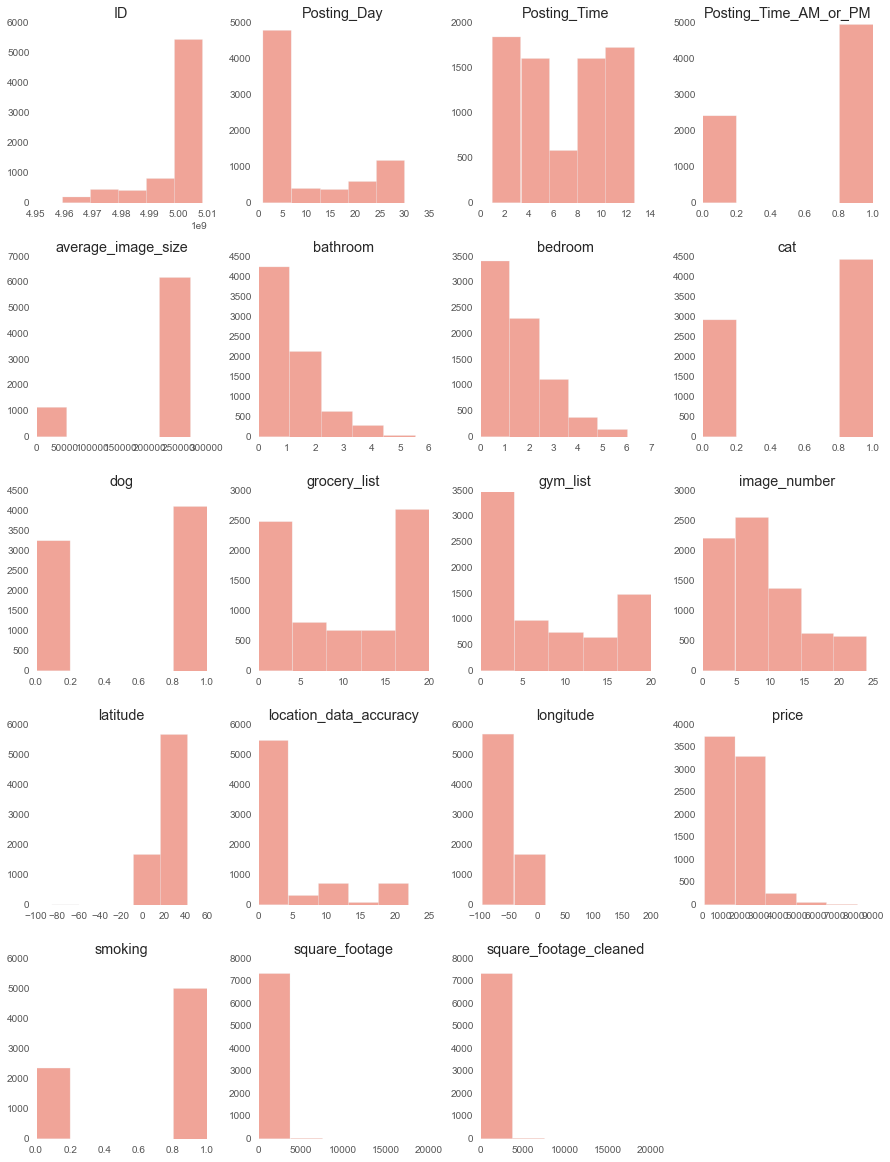

In [39]:
# Create a histogram to show the distribution in each variable

data.hist(alpha=0.5, bins=5, figsize=(15, 20))

In [30]:
# Create visualization plotting each field by price to determine which fields have instances with significant 
# differences in price

def visualize_all_fields_by_price(field):
    # Remove outliers for latitude and longitude
    if field == 'longitude':
        data[(data.longitude < -76.5) & (data.longitude > -78)].groupby('longitude')[['price']].mean().plot(figsize=(15, 2))
    elif field == 'latitude':
        data[(data.latitude > 38) & (data.latitude < 40)].groupby('latitude')[['price']].mean().plot(figsize=(15, 2))  
    
    # Avoid plotting price by price (itself)or ID
    elif field == 'price': pass 
    elif field == 'ID': pass 
    
    # Text descriptions do not have categories to visualize
    elif field == 'description': pass
    elif field == 'url': pass
    
    else:
        data.groupby(field)[['price']].mean().plot(figsize=(15, 2))

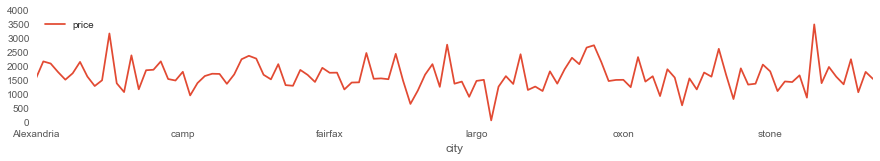

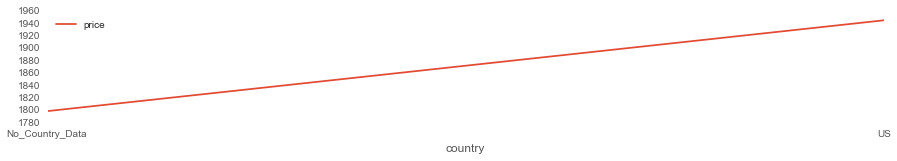

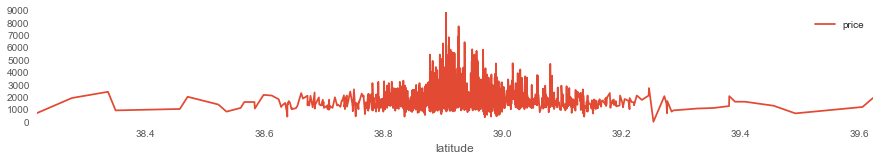

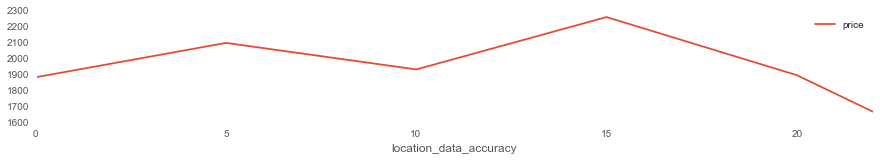

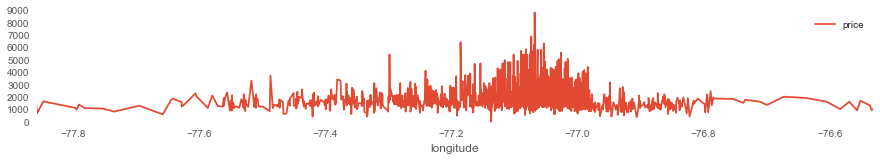

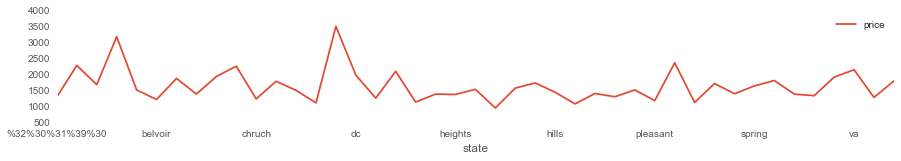

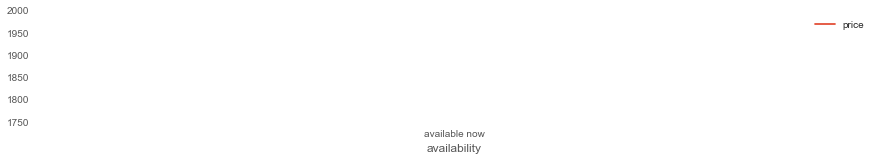

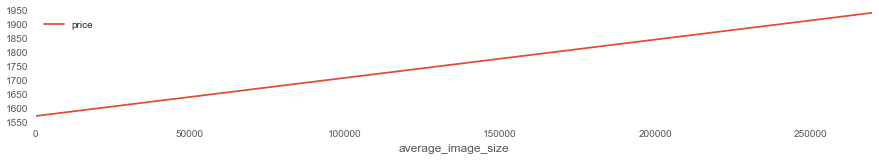

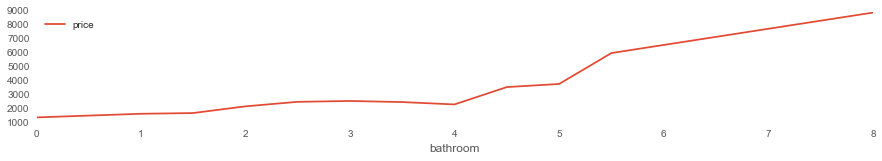

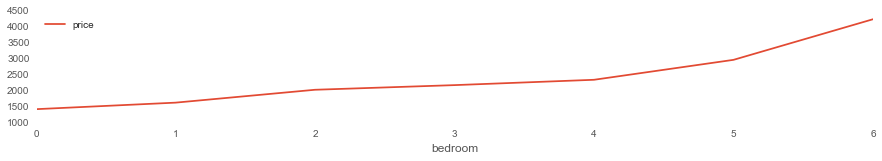

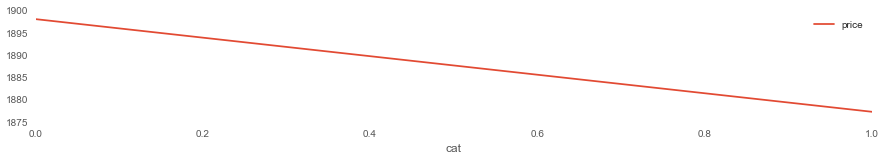

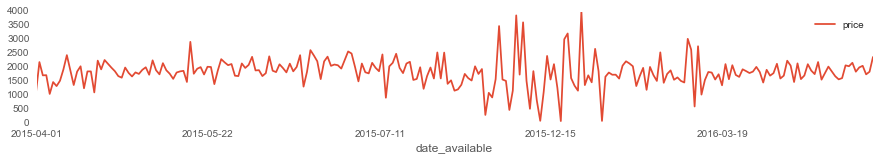

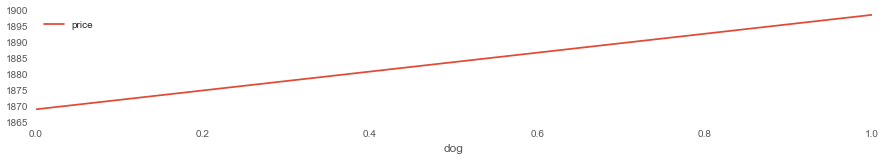

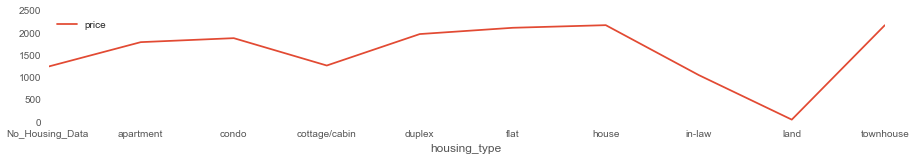

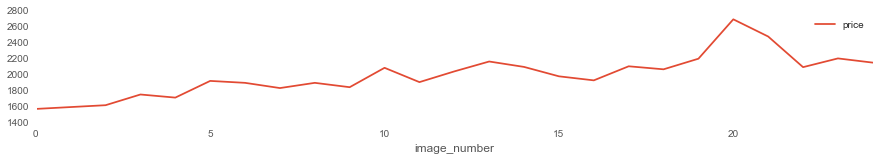

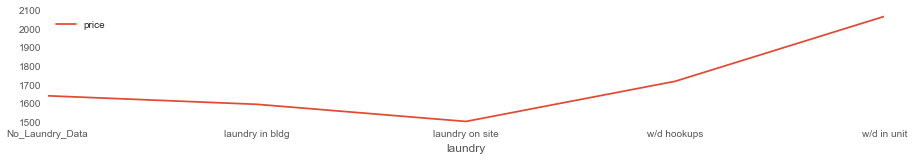

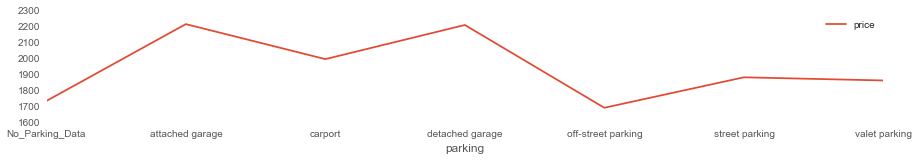

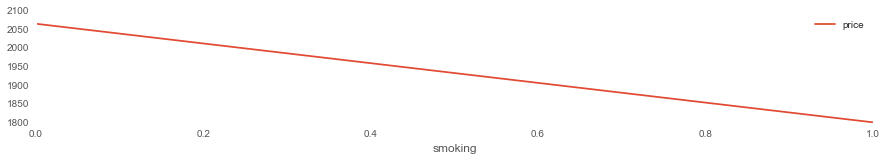

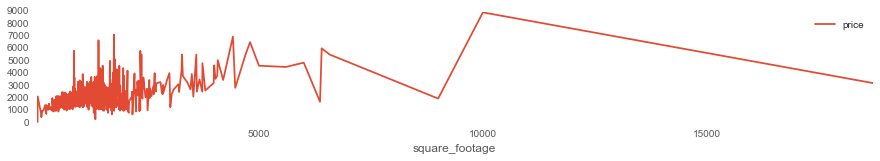

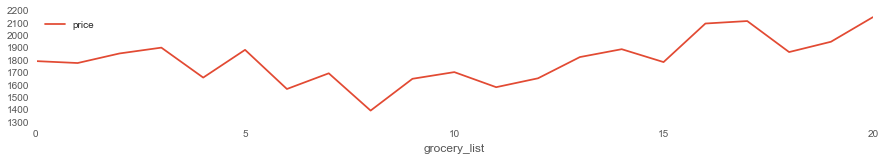

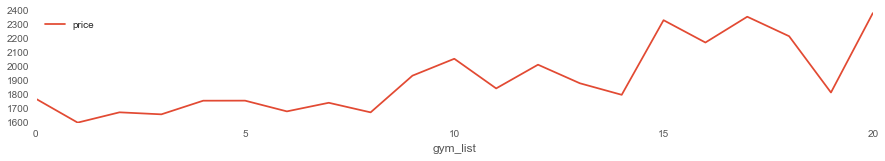

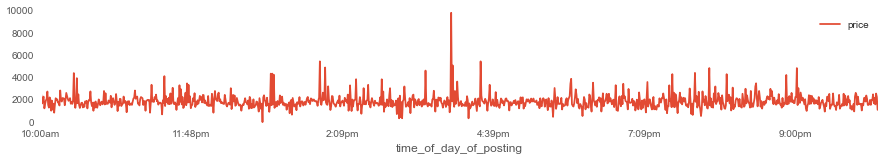

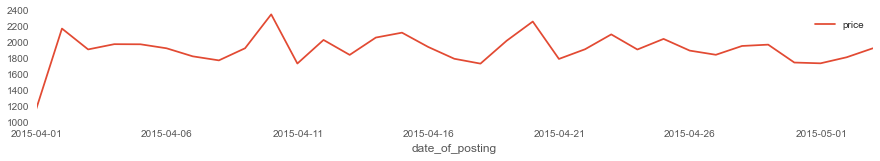

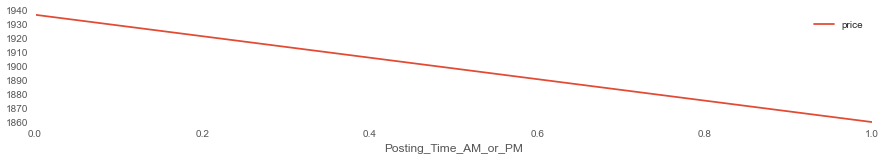

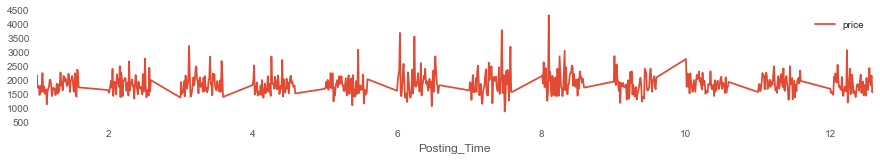

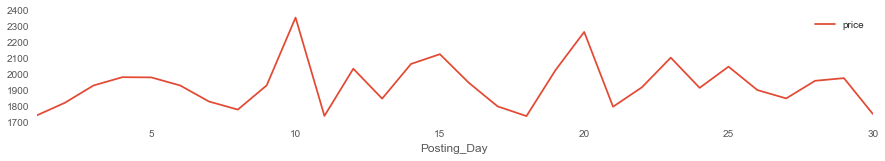

In [31]:
# View the visualizations from visualize_all_fields_by_price

for field in data.columns:
    visualize_all_fields_by_price(field)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000271E9CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000204FA240>]], dtype=object)

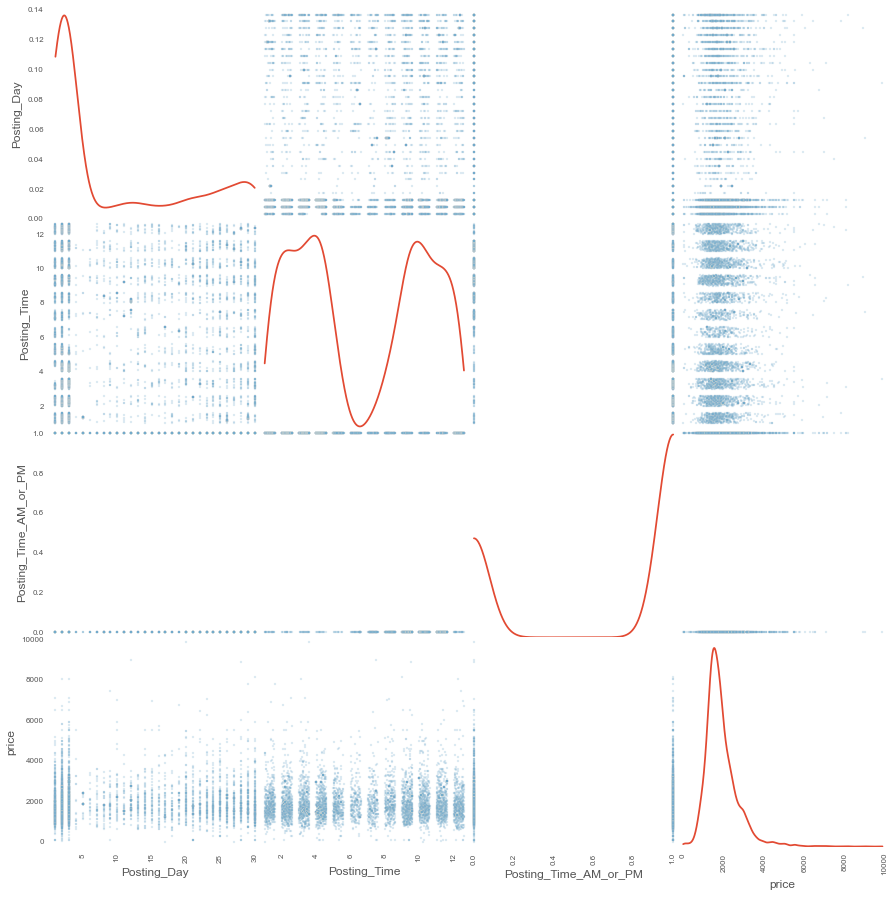

In [36]:
# Create a scatter matrix to view the correlation between Google Places API data for subways and train stations

scatter_matrix(data[['Posting_Day','Posting_Time','Posting_Time_AM_or_PM','price']], alpha=0.2, figsize=(15, 15), diagonal='kde')

In [26]:
data.to_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_Final.csv', index=False)